# **Problem (design a non-uniform quantizer)** 

Suppose that we need to transmit a sequence of real numbers over some channel using a non-uniform 8-bit quantizer. This means that the set of real numbers is divided into $2^8$ intervals $U_n = [a_{n-1}, a_n]$ (such that $a_0 = -\inf, a_{2^8} = +\inf$), to each interval we assign a number $b_n$, and whenever we want to transmit a number from an interval $U_n$, we instead transmit the number $b_n$. Suppose that the numbers to be transmitted have a Gaussian distribution with variance 1.


1.   Find numerically the values $a_n$, $b_n$ minimizing the transmission MSE and compute this optimal MSE. Plot the resulting intervals and the values $b_n$.Consider the uniform quantization scenario in which the points $a_n$ $(0<n<2^8)$ are uniformly distributed in some interval.
2.   Find numerically the interval for which the transmission MSE is minimized, and compare the respective MSE to the optimal non-uniform MSE from item 1.





In [ ]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


To solve this task we are going to try such popular quantization technique as K-means clustering, that aims to partion N observations into k clusters in which each observation belongs to the cluster with the nearest mean (this point is called cluster center). This algorithm minimizes the total quadratic deviation of the points of clusters from the centers of these clusters. 


# Kmeans

At first, some usefull functions were implemented for plotting results and for encoding.
 

In [ ]:
def encode(X):
    Y = zeros_like(X)
    prev = -100
    cls_label = -1
    
    for i in range(len(X)):
        if X[i] == prev :
            Y[i] = cls_label
            prev = X[i]
        else:
            cls_label += 1
            Y[i] = cls_label
            prev = X[i]
        
    return Y

def plot_quantizer(X_ ,Y_):
    '''
    Plots Quantization diagram
    inputs:
    @X : array of quantizer's input values
    @Y : array of quantizer's output values
    '''

    plt.figure(figsize=(30,5))
    plt.step(X_,Y_)
    plt.grid(alpha = 0.4)
    plt.title('Quantizer diagram', fontsize = 18)
    plt.xlabel('Input signal', fontsize = 15)
    plt.ylabel('Output signal', fontsize = 15)
    plt.xlim(X_.min()+0.5, X_.max()-0.5)
    plt.show()

def plot_signal(x):
    '''
    Plots signal samples
    input:
    @x - array of samples of input signals
    '''
    plt.figure(figsize=(30,5))
    plt.title('Samples of input signal', fontsize = 16)
    plt.xlabel('n_sample', fontsize = 14)
    plt.ylabel('Amplitude', fontsize = 14)
    plt.xlim(-1, len(x)+1)
    plt.plot(x,alpha = 0.6)

def plot_both_signals(x_true, x_pred):
    '''
    Plots two signal at the same plot.
    inputs:
    @x_true - initial signal samples
    @x_pred - signal samples after quantizer
    '''

    plt.figure(figsize=(30,5))
    plt.title('Samples of input signal', fontsize = 16)
    plt.xlabel('n_sample', fontsize = 14)
    plt.ylabel('Amplitude', fontsize = 14)
    plt.xlim(-10, len(x_true)+10)
    plt.plot(x_true, alpha = 0.9, label ='true_signal')
    plt.plot(x_pred, alpha = 0.5, label = 'quintized_signal')
    plt.legend()
    plt.show()

At first let's use normal distributed data.


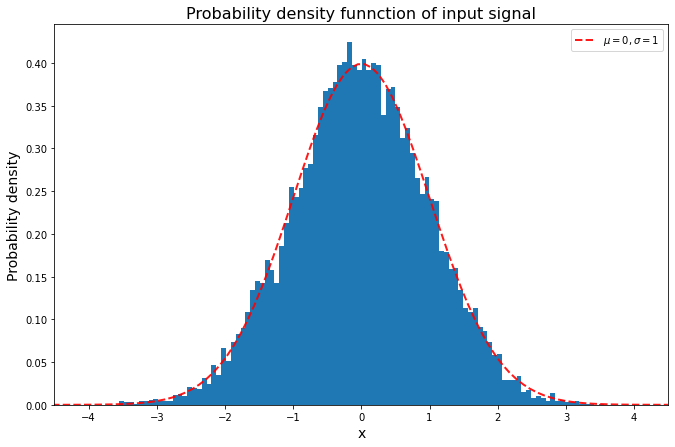

In [ ]:
from sklearn.cluster import KMeans

#parameters of distribution
mu = 0
sigma = 1

# generating the train set
X = np.random.normal(loc=mu, scale=sigma, size= 10**4).reshape(-1,1)

# an envelope of the distribution 
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (np.linspace(-5,5, 100) - mu))**2))


plt.figure(figsize=(11,7))
plt.title("Probability density funnction of input signal", fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('Probability density', fontsize = 14)
plt.hist(X, bins=100, density = True );
plt.plot(np.linspace(-5,5, 100), y, '--', color = 'r', linewidth = 2, alpha = 0.9, label = "$\mu = 0 , \sigma = 1$")
plt.xlim(-4.5,4.5)
plt.legend()
plt.show()

Also, let's look at our signal.

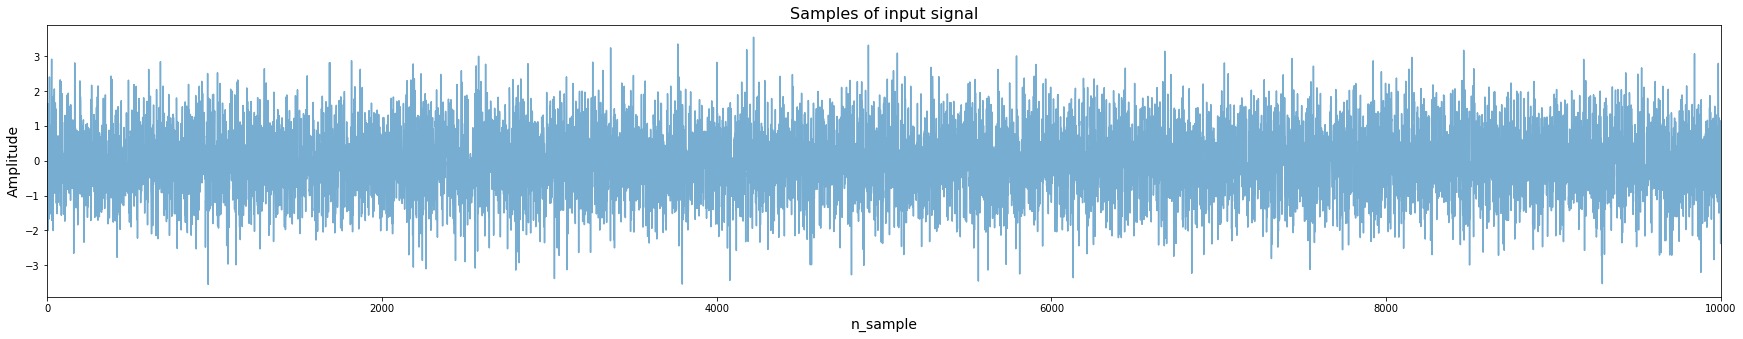

In [ ]:
plot_signal(X)

In [ ]:
from sklearn.cluster import KMeans

def labels_to_centers(labels, centers):
    Z = np.empty_like(labels, dtype= np.float32)
    for label, coord in zip(np.unique(labels), centers):
        Z[labels==label] = coord
    return Z

#fitting Kmeans model
kmeans = KMeans(n_clusters=256, random_state=0).fit(X)
# get cluster's centers
centers = kmeans.cluster_centers_.flatten()
labels = kmeans.predict(X)
pred = labels_to_centers(labels, centers)

These center points we can use as $a_n$ values. Let's plot the graph with decision thresholds.

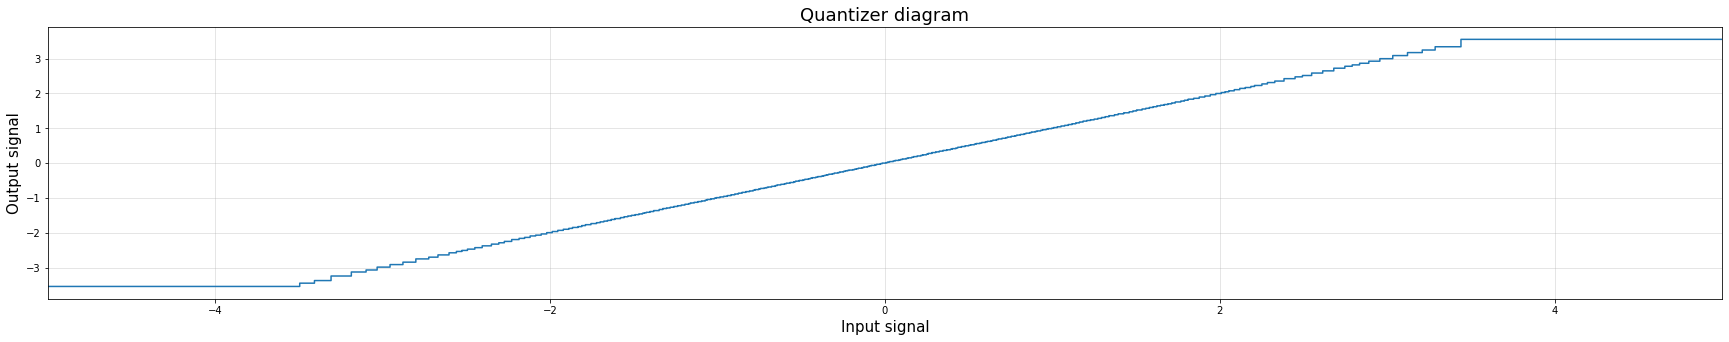

MSE: 3.252414089797176e-05


In [ ]:
from sklearn.metrics import mean_squared_error
X_linear = np.linspace(-5.5,5.5, 1000).reshape((-1,1))
preds_linear = kmeans.predict(X_linear)
preds_linear = labels_to_centers(preds_linear, centers)
plot_quantizer(X_linear, preds_linear)
mse_1 = mean_squared_error(X, pred)
print('MSE:', mse_1)

And we can compare input signal and signal after quantization.


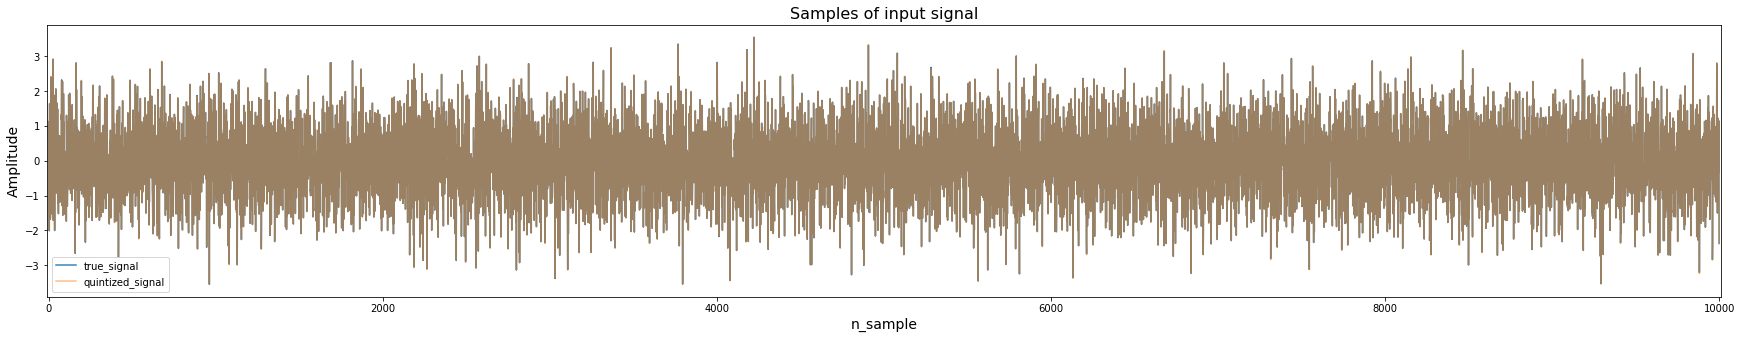

In [ ]:
plot_both_signals(X, pred)

Let's try the same approach with uniformly distributed data

No handles with labels found to put in legend.


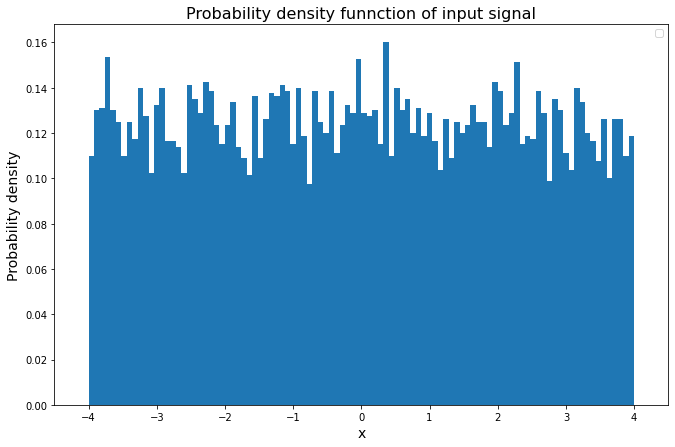

In [ ]:
X = np.random.uniform(high = 4, low=-4,size= 10**4).reshape(-1,1)

plt.figure(figsize=(11,7))
plt.title("Probability density funnction of input signal", fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('Probability density', fontsize = 14)
plt.hist(X, bins=100, density = True );
plt.xlim(-4.5,4.5)
plt.legend()
plt.show()

#fitting Kmeans model
kmeans = KMeans(n_clusters=256, random_state=0).fit(X)
# get cluster's centers
centers = kmeans.cluster_centers_.flatten()
labels = kmeans.predict(X)
pred = labels_to_centers(labels, centers)

Decision thresholds

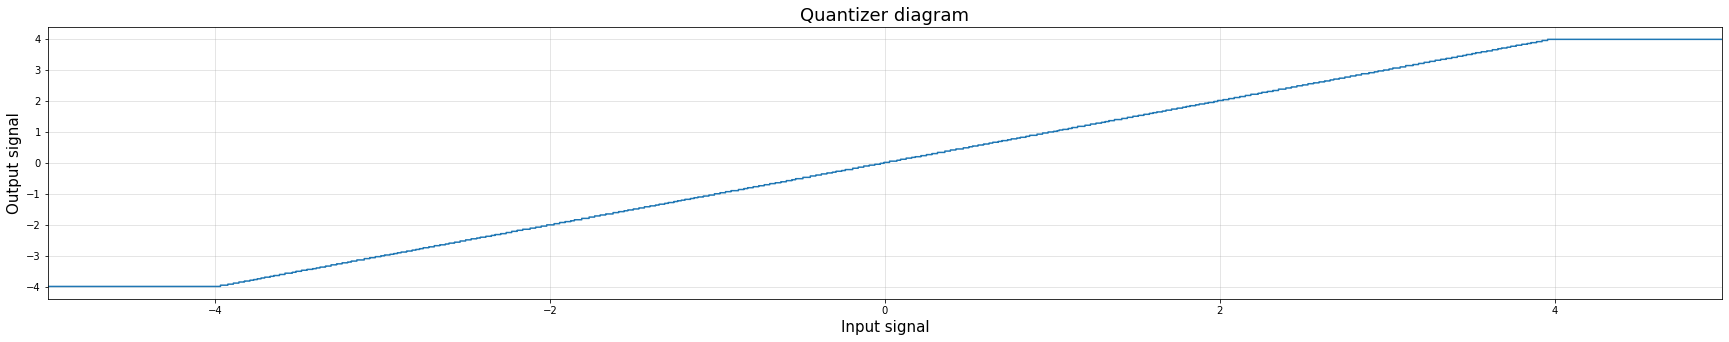

MSE: 3.252414089797176e-05


In [ ]:
from sklearn.metrics import mean_squared_error
X_linear = np.linspace(-5.5,5.5, 1000).reshape((-1,1))
preds_linear = kmeans.predict(X_linear)
preds_linear = labels_to_centers(preds_linear, centers)
plot_quantizer(X_linear, preds_linear)
mse_2 = mean_squared_error(X, pred)
print('MSE:', mse_1)

And compare signals

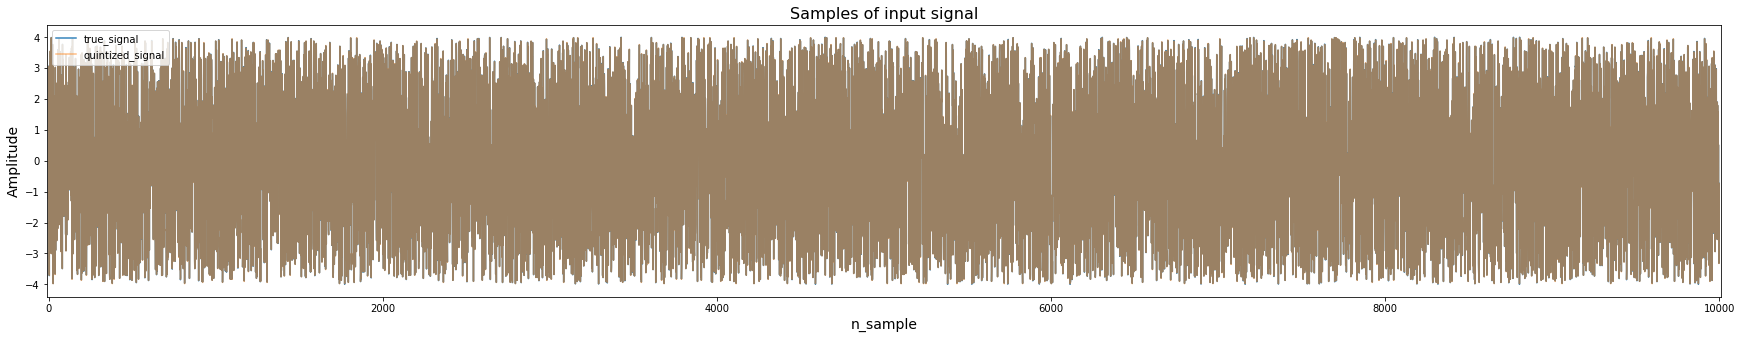

In [ ]:
plot_both_signals(X, pred)



---



# **Decission Tree regressor**

Another good ML approach that can be used for quantization tasks is Decision Trees. Because it uses MSE for solving the minimization problem (or another criterion) and we can tune manualy 'max_leaf_nodes' to have the required order of quantization. Let's try this approach.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# generate normaly distributed data
X = np.random.normal(loc=mu, scale=sigma, size= 10**4).reshape(-1,1)

#fitting DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=2**8)
regr_1.fit(X, X)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=256,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

let's calculate MSE loss on test data.

In [ ]:
# generating test data
x_test = np.random.normal(loc=mu, scale=sigma, size = 10000).reshape(-1,1)
x_pred = regr_1.predict(x_test)

# MSE calculating
mse_3 = mean_squared_error(x_test, x_pred)
print('MSE: ', mse_1)

MSE:  3.252414089797176e-05


Let's look at decision thresholds

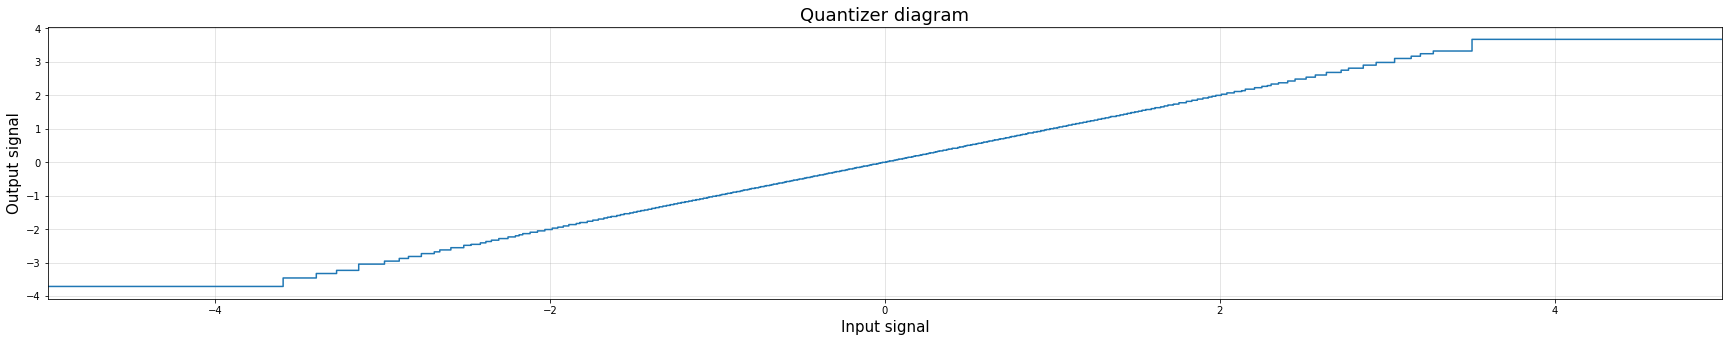

In [ ]:
#generaing linear data
x_linear = np.linspace(-5.5,5.5, 1000).reshape((-1,1))
plot_quantizer(x_linear, regr_1.predict(x_linear))

And we can plot original and quantized signal

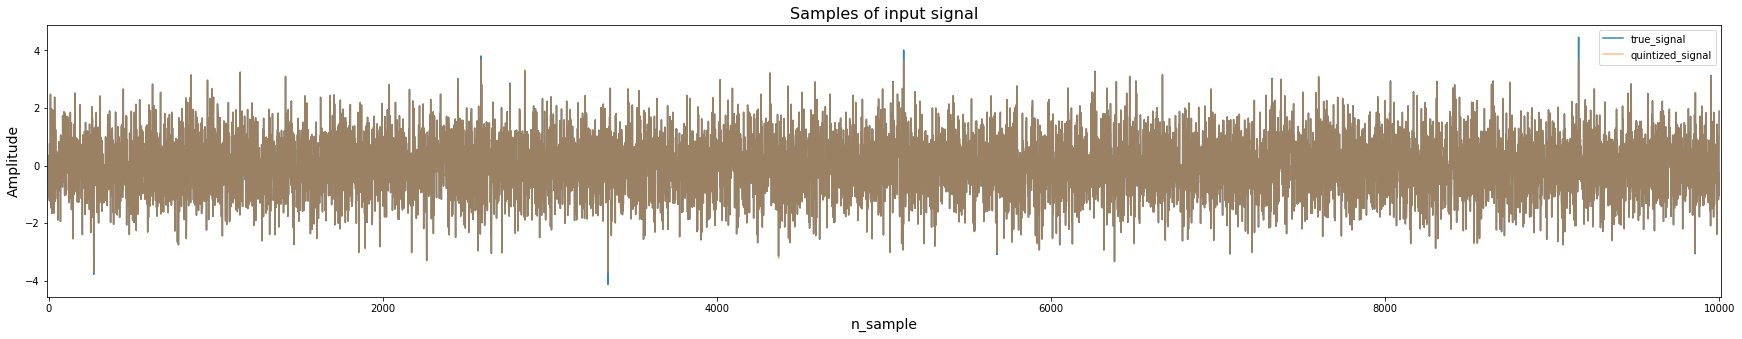

In [ ]:
plot_both_signals(x_test, x_pred)

**Uniformly distributed data.**

We are going to do the same steps here but use uniformly distributed data instead of normally distributed

In [ ]:
# generate uniform data
X = np.random.uniform(low= -4, high = 4, size= 10**4).reshape(-1,1)

# Creating and fitting DecisionTreeRegressor
regr_2 = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=2**8)
regr_2.fit(X, X)

#Checking MSE on test data
x_test = np.random.uniform(low= -4, high = 4, size = 10000).reshape(-1,1)
x_pred = regr_2.predict(x_test)

mse_4 = mean_squared_error(x_test, x_pred)
print('MSE: ', mse_2)

MSE:  7.930009489713119e-05


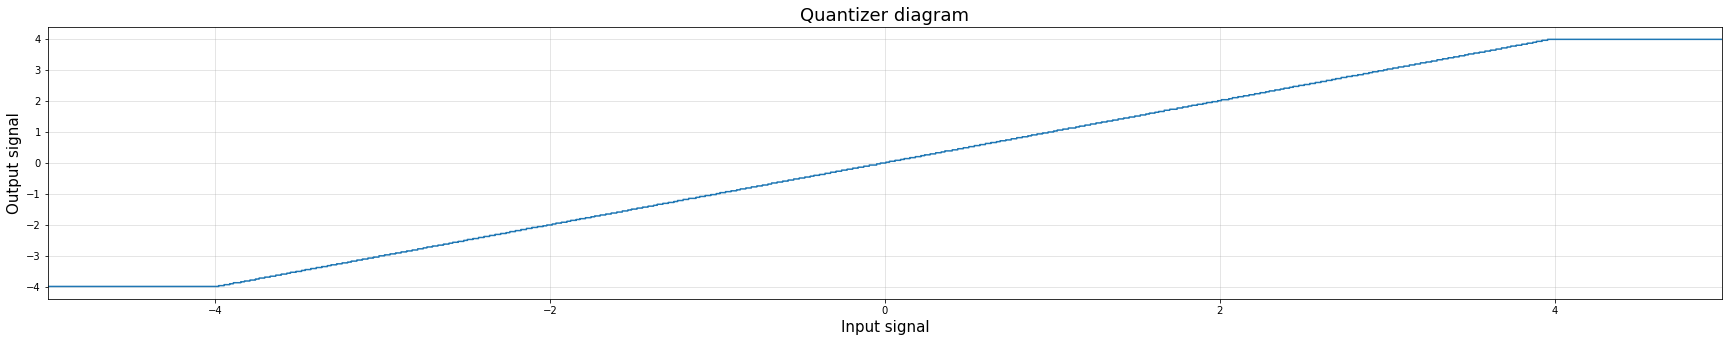

In [ ]:

x_linear = np.linspace(-5.5,5.5, 1000).reshape((-1,1))
plot_quantizer(x_linear, regr_2.predict(x_linear))

Let's plot original and quantized signal

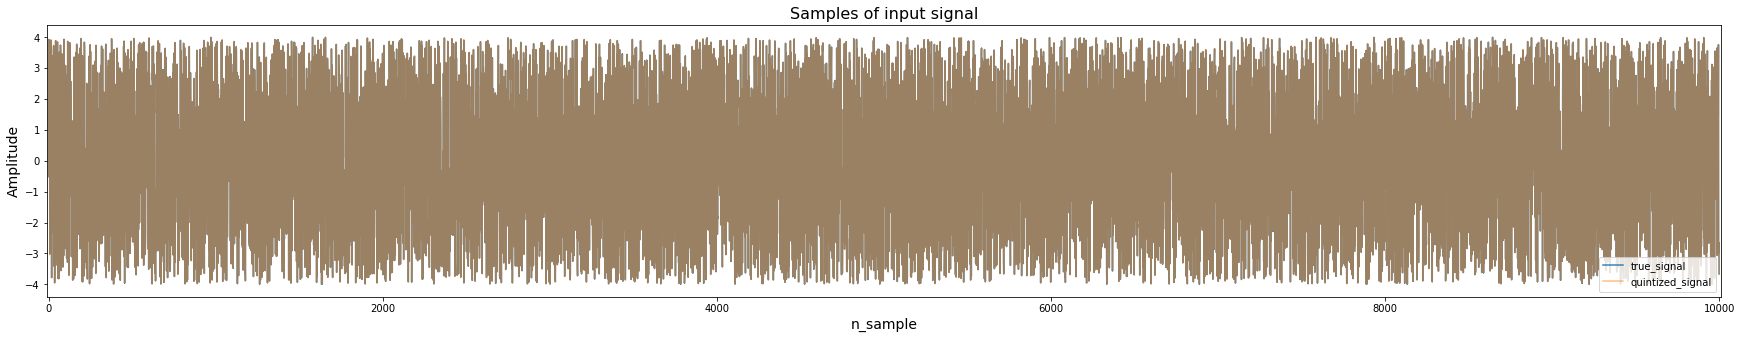

In [ ]:
plot_both_signals(x_test, x_pred)

# Conclusions

In [ ]:
print('Kmeans, normal disrtib. MSE          :    ',mse_1)
print('Kmeans, uniform disrtrib . MSE       :    ',mse_2)
print('Decission Tree, normal disrtib. MSE  :    ',mse_3)
print('Decission Tree, uniform disrtib. MSE  :    ',mse_4)

Kmeans, normal disrtib. MSE          :     3.252414089797176e-05
Kmeans, uniform disrtrib . MSE       :     7.930009489713119e-05
Decission Tree, normal disrtib. MSE  :     0.00013435824885637185
Decission Tree, uniform disrtib. MSE  :     8.334103465742546e-05


Both algorithms achieved good results. According to the result, we can see that Kmeans performs better than the Decision Tree (difference between models can be seen where x have min and max possible levels. In case of the decision tree, this interval is more inaccurate), however, the second algorithm is quite faster than first one.